In [ ]:
import time
start_time = time.time()
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt

In [ ]:
X_train, y_train = loadlocal_mnist(images_path='train-images.idx3-ubyte', labels_path='train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path= 't10k-images.idx3-ubyte', labels_path= 't10k-labels.idx1-ubyte')
print(f'Initial size of the training set of the given dataset  = {X_train.shape}')
print(f'Initial size of the testing set of the given dataset = {X_test.shape}')

Initial size of the training set of the given dataset  = (60000, 784)
Initial size of the testing set of the given dataset = (10000, 784)


In [ ]:
def print_image(image,label,type):  ## function to print the images randomly chosen from the given X_train and X_test
  image = image.reshape(28,28)
  if type == 'train':
    plt.figure()
    plt.imshow(image,cmap = 'Blues')
    print(f'Label of training data:{label}')
  else:
    plt.figure()
    plt.imshow(image,cmap = 'inferno')
    print(f'Label of testing data: {label}')

In [ ]:
def normalize(v):
  norm = np.linalg.norm(v)
  if norm == 0:
    return v
  return v/norm

In [ ]:
def dist(train_data,test_data):
  dist_mat = np.empty([train_data.shape[0],test_data.shape[0]])
  for i in range(0,train_data.shape[0]):
    if(i % 1000 == 0):
      print(f'Reached {i} vectors')
    for k in range(0,test_data.shape[0]):
      dist_mat[i][k] = np.linalg.norm(train_data[i] - test_data[k])
  return dist_mat

In [ ]:
def retrieve(i,DM,k):
  vect = DM[i]
  sorted_indices = np.argsort(vect)
  return sorted_indices[:k]

In [ ]:
def precision_score(index_labels,label):
  s = 0
  for x in index_labels:
    if x == label:
      s += 1
  return s/len(index_labels)


In [ ]:
def average_precision(train_norm,test_norm,train_label,test_label,M,k):
  total_score = 0
  for i in range(0,M.shape[0]):
    I_labels = []
    I = retrieve(i,M,k)
    for x in I:
      I_labels.append(test_label[x])
    total_score = total_score + precision_score(I_labels,train_label[i])
  return total_score / M.shape[0]

Label of training data:4
Label of testing data: 8
Label of training data:3
Label of testing data: 7
Label of training data:3
Label of testing data: 0
Label of training data:1
Label of testing data: 0
Label of training data:6
Label of testing data: 7
Label of training data:3
Label of testing data: 1
Label of training data:6
Label of testing data: 3
Label of training data:6
Label of testing data: 1
Label of training data:0
Label of testing data: 3
Label of training data:1
Label of testing data: 2


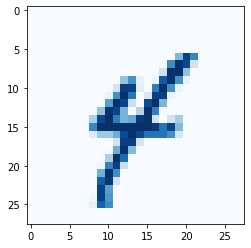

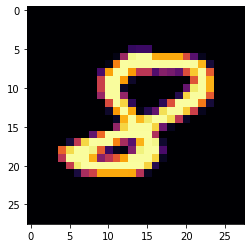

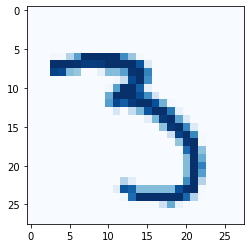

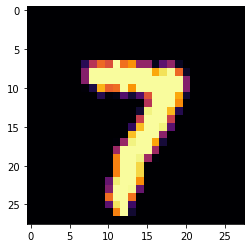

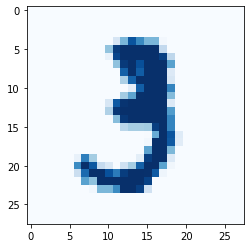

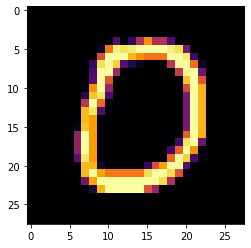

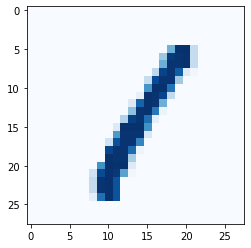

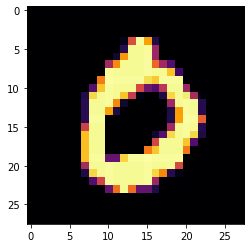

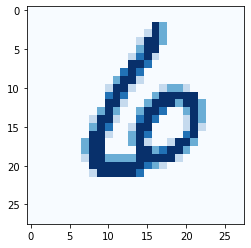

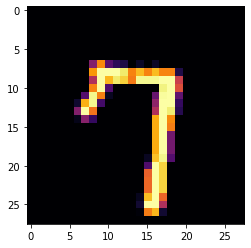

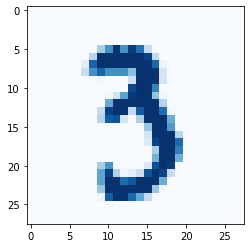

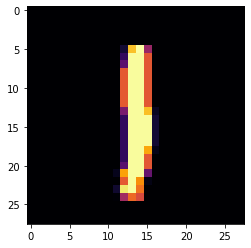

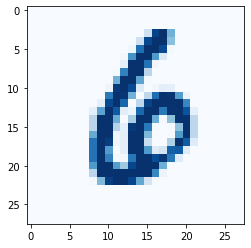

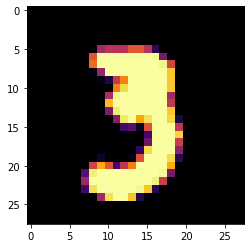

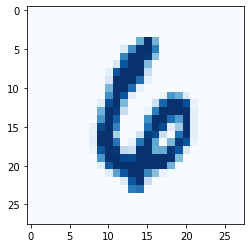

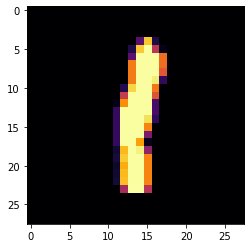

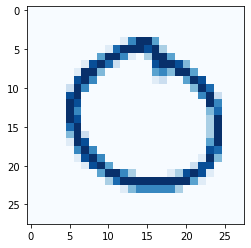

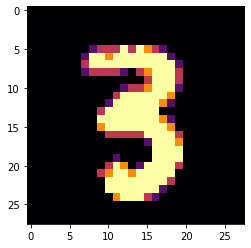

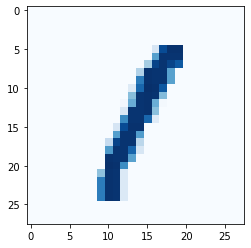

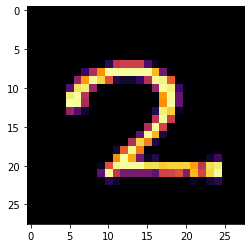

In [ ]:
R = np.random.rand(10) * 100
R = [int(x) for x in R]
for t in R:
  dummy_train = X_train[t]
  dummy_test = X_test[t]
  print_image(dummy_train,y_train[t],'train')
  print_image(dummy_test,y_test[t],'test')

In [ ]:
train_norm = np.empty([15000,784])
test_norm = np.empty([2500,784])
train_label = y_train[:15000]   #setting the dataset amount to the number mentioned in the homework pdf
test_label = y_test[:2500]  #setting the dataset amount to the number mentioned in the homework pdf
for i in range(0,15000):
  train_norm[i] = normalize(X_train[i])
for i in range(0,2500):
  test_norm[i] = normalize(X_test[i])

In [ ]:
M = dist(train_norm,test_norm)
print(f'Shape of the distance matrix is {M.shape}')
total_time = time.time() - start_time
print(f'Total run time for calculating the distance matrix for 15000 train cases against 2500 cases is {total_time} seconds')

Reached 0 vectors
Reached 1000 vectors
Reached 2000 vectors
Reached 3000 vectors
Reached 4000 vectors
Reached 5000 vectors
Reached 6000 vectors
Reached 7000 vectors
Reached 8000 vectors
Reached 9000 vectors
Reached 10000 vectors
Reached 11000 vectors
Reached 12000 vectors
Reached 13000 vectors
Reached 14000 vectors
Shape of the distance matrix is (15000, 2500)
Total run time for calculating the distance matrix for 15000 train cases against 2500 cases is 744.7340774536133 seconds


K =  1 the average precision of the algorithm is 0.9013333333333333
K =  2 the average precision of the algorithm is 0.8811333333333333
K =  5 the average precision of the algorithm is 0.8441199999999836
K =  10 the average precision of the algorithm is 0.8044733333333054
K =  20 the average precision of the algorithm is 0.7524166666666653
K =  50 the average precision of the algorithm is 0.6566893333333217
K =  100 the average precision of the algorithm is 0.5580899999999986
K =  200 the average precision of the algorithm is 0.4393339999999983
K =  500 the average precision of the algorithm is 0.27682786666666465
K =  1000 the average precision of the algorithm is 0.18418693333333347


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

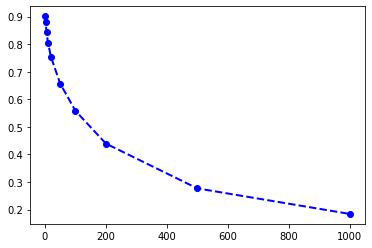

In [ ]:
k = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
a = []
av_k_pair = {}
for x in k:
  g = average_precision(train_norm,test_norm,train_label,test_label,M,x)
  a.append(g)
  av_k_pair[x] = g
  print(f'K =  {x} the average precision of the algorithm is {av_k_pair[x]}')
  plt.plot(k,a,color='blue', marker='x', linestyle='dashed',
     linewidth=2, markersize=12)

The above graph shows that as we take up more values for the calculation of the approximate label we get more lesser accurate data as the important data is usually the ones with the higher similarity index. After finding the cosine similarity it's always better to use the values from the top n% of the data instead of large amounts of data set.